# Part I - EDA

### Esstential Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
rs=17

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data

In [2]:
train = pd.read_csv("../input/regressionproblem/data.csv")
test = pd.read_csv("../input/regressionproblem/test.csv")
sample_submission = pd.read_csv("../input/regressionproblem/sample_submission.csv")

### Train Test Fraction

In [3]:
print(f'Training data: {train.shape}, Testing data: {test.shape}')
print(f'Test fraction: {test.shape[0]*100/(train.shape[0]+test.shape[0])}%')

Training data: (12000, 12), Testing data: (3000, 11)
Test fraction: 20.0%


## Basic Statistics

In [4]:
train.head()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,9214,-1.269584,-0.471276,1.271286,1.181464,-0.100392,1.449701,1.377916,-0.065368,-0.292402,-0.227562,-6.744388
1,9936,-3.345712,0.962012,-0.010381,-1.143822,2.144663,0.002984,-0.062975,0.239043,1.026711,0.937543,-209.017251
2,6148,-0.177312,-0.654352,1.139073,0.449924,-0.428796,0.956123,1.523470,-0.016801,0.279851,-0.183580,136.280877
3,3466,-0.465802,1.430401,0.565258,-0.882161,0.228255,-0.579749,1.538078,2.194240,-0.029758,0.686409,92.047959
4,6878,1.145984,0.663759,1.589677,0.773086,0.838778,1.354121,-0.156710,-0.403062,0.140580,-1.136642,91.349775


In [5]:
test.head()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,10410,0.831503,0.673125,-1.607432,1.267487,0.265350,0.805762,-0.135540,0.810326,0.498808,-0.584001
1,718,-1.206036,-0.456968,-0.536392,-1.133226,0.070133,0.574171,-2.011571,-1.570167,0.667464,-0.863430
2,5931,-0.037776,-0.652096,-1.279755,1.249820,0.894197,0.537048,1.036409,-0.452001,0.933147,0.971099
3,4083,-0.139102,-0.065384,0.411374,0.506823,1.182848,-2.252294,-0.934518,-0.802033,0.015464,0.024758
4,210,0.896840,0.837373,0.700850,0.044589,-0.438502,0.555532,-0.577513,0.992361,-0.976567,-0.597940


In [6]:
train.describe()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7494.513917,0.004974,0.012140,-0.022285,-0.012062,0.003552,-0.009410,0.004016,0.010196,-0.019022,0.002471,-0.487119
std,4324.286702,1.005618,0.999312,0.993402,0.999454,0.987673,1.000908,0.999135,1.012335,0.999567,1.004209,139.903519
min,0.000000,-3.820123,-4.029950,-3.929342,-3.936197,-4.358125,-4.136878,-3.790943,-3.629488,-3.869151,-3.967560,-596.004289
25%,3755.750000,-0.664412,-0.655589,-0.679831,-0.682227,-0.652337,-0.685387,-0.667220,-0.677371,-0.692518,-0.678522,-95.245867
50%,7498.500000,0.002035,0.014120,-0.039326,-0.012313,-0.002225,0.003303,0.005063,0.012616,-0.013836,0.015506,-1.481471
75%,11219.250000,0.683925,0.690300,0.645138,0.665014,0.658617,0.660079,0.673609,0.696309,0.653956,0.684136,93.184756
max,14999.000000,3.877674,3.922182,3.744429,3.644103,4.219952,3.749046,3.627607,3.478818,3.339246,3.763244,534.723229


In [7]:
test.describe()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,7519.444333,-0.021070,-0.005002,0.017244,0.037328,-0.006816,0.001211,-0.024697,-0.017980,-0.019439,-0.002883
std,4354.794485,0.988122,1.011713,1.014127,1.014532,1.011679,1.001229,1.002813,1.002026,1.000193,0.989139
min,1.000000,-3.653770,-3.270985,-4.114516,-3.437602,-4.278709,-3.643695,-3.668824,-3.716047,-3.131915,-3.017411
25%,3721.500000,-0.705011,-0.682154,-0.637537,-0.633892,-0.700195,-0.671334,-0.707138,-0.690706,-0.702747,-0.652687
50%,7505.000000,0.003878,-0.010357,0.018319,0.052035,-0.006337,-0.038217,-0.017925,-0.013807,-0.009607,-0.009502
75%,11321.250000,0.655303,0.686276,0.690692,0.723549,0.651368,0.662781,0.662347,0.648766,0.621509,0.662184
max,14994.000000,3.222436,3.168050,3.725377,3.325196,3.743739,3.214820,3.261355,3.250612,3.204031,3.197145


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12000 non-null  int64  
 1   x0      12000 non-null  float64
 2   x1      12000 non-null  float64
 3   x2      12000 non-null  float64
 4   x3      12000 non-null  float64
 5   x4      12000 non-null  float64
 6   x5      12000 non-null  float64
 7   x6      12000 non-null  float64
 8   x7      12000 non-null  float64
 9   x8      12000 non-null  float64
 10  x9      12000 non-null  float64
 11  y       12000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


## Data Modification

### Splitting Data

In [9]:
X, y = train.iloc[:,1:-1], train.iloc[:,-1]
X_test = test.iloc[:, 1:]
features = X.columns

### Data Shape

In [10]:
X.shape, y.shape, X_test.shape

((12000, 10), (12000,), (3000, 10))

## Plots

### Train vs. Test Distribution

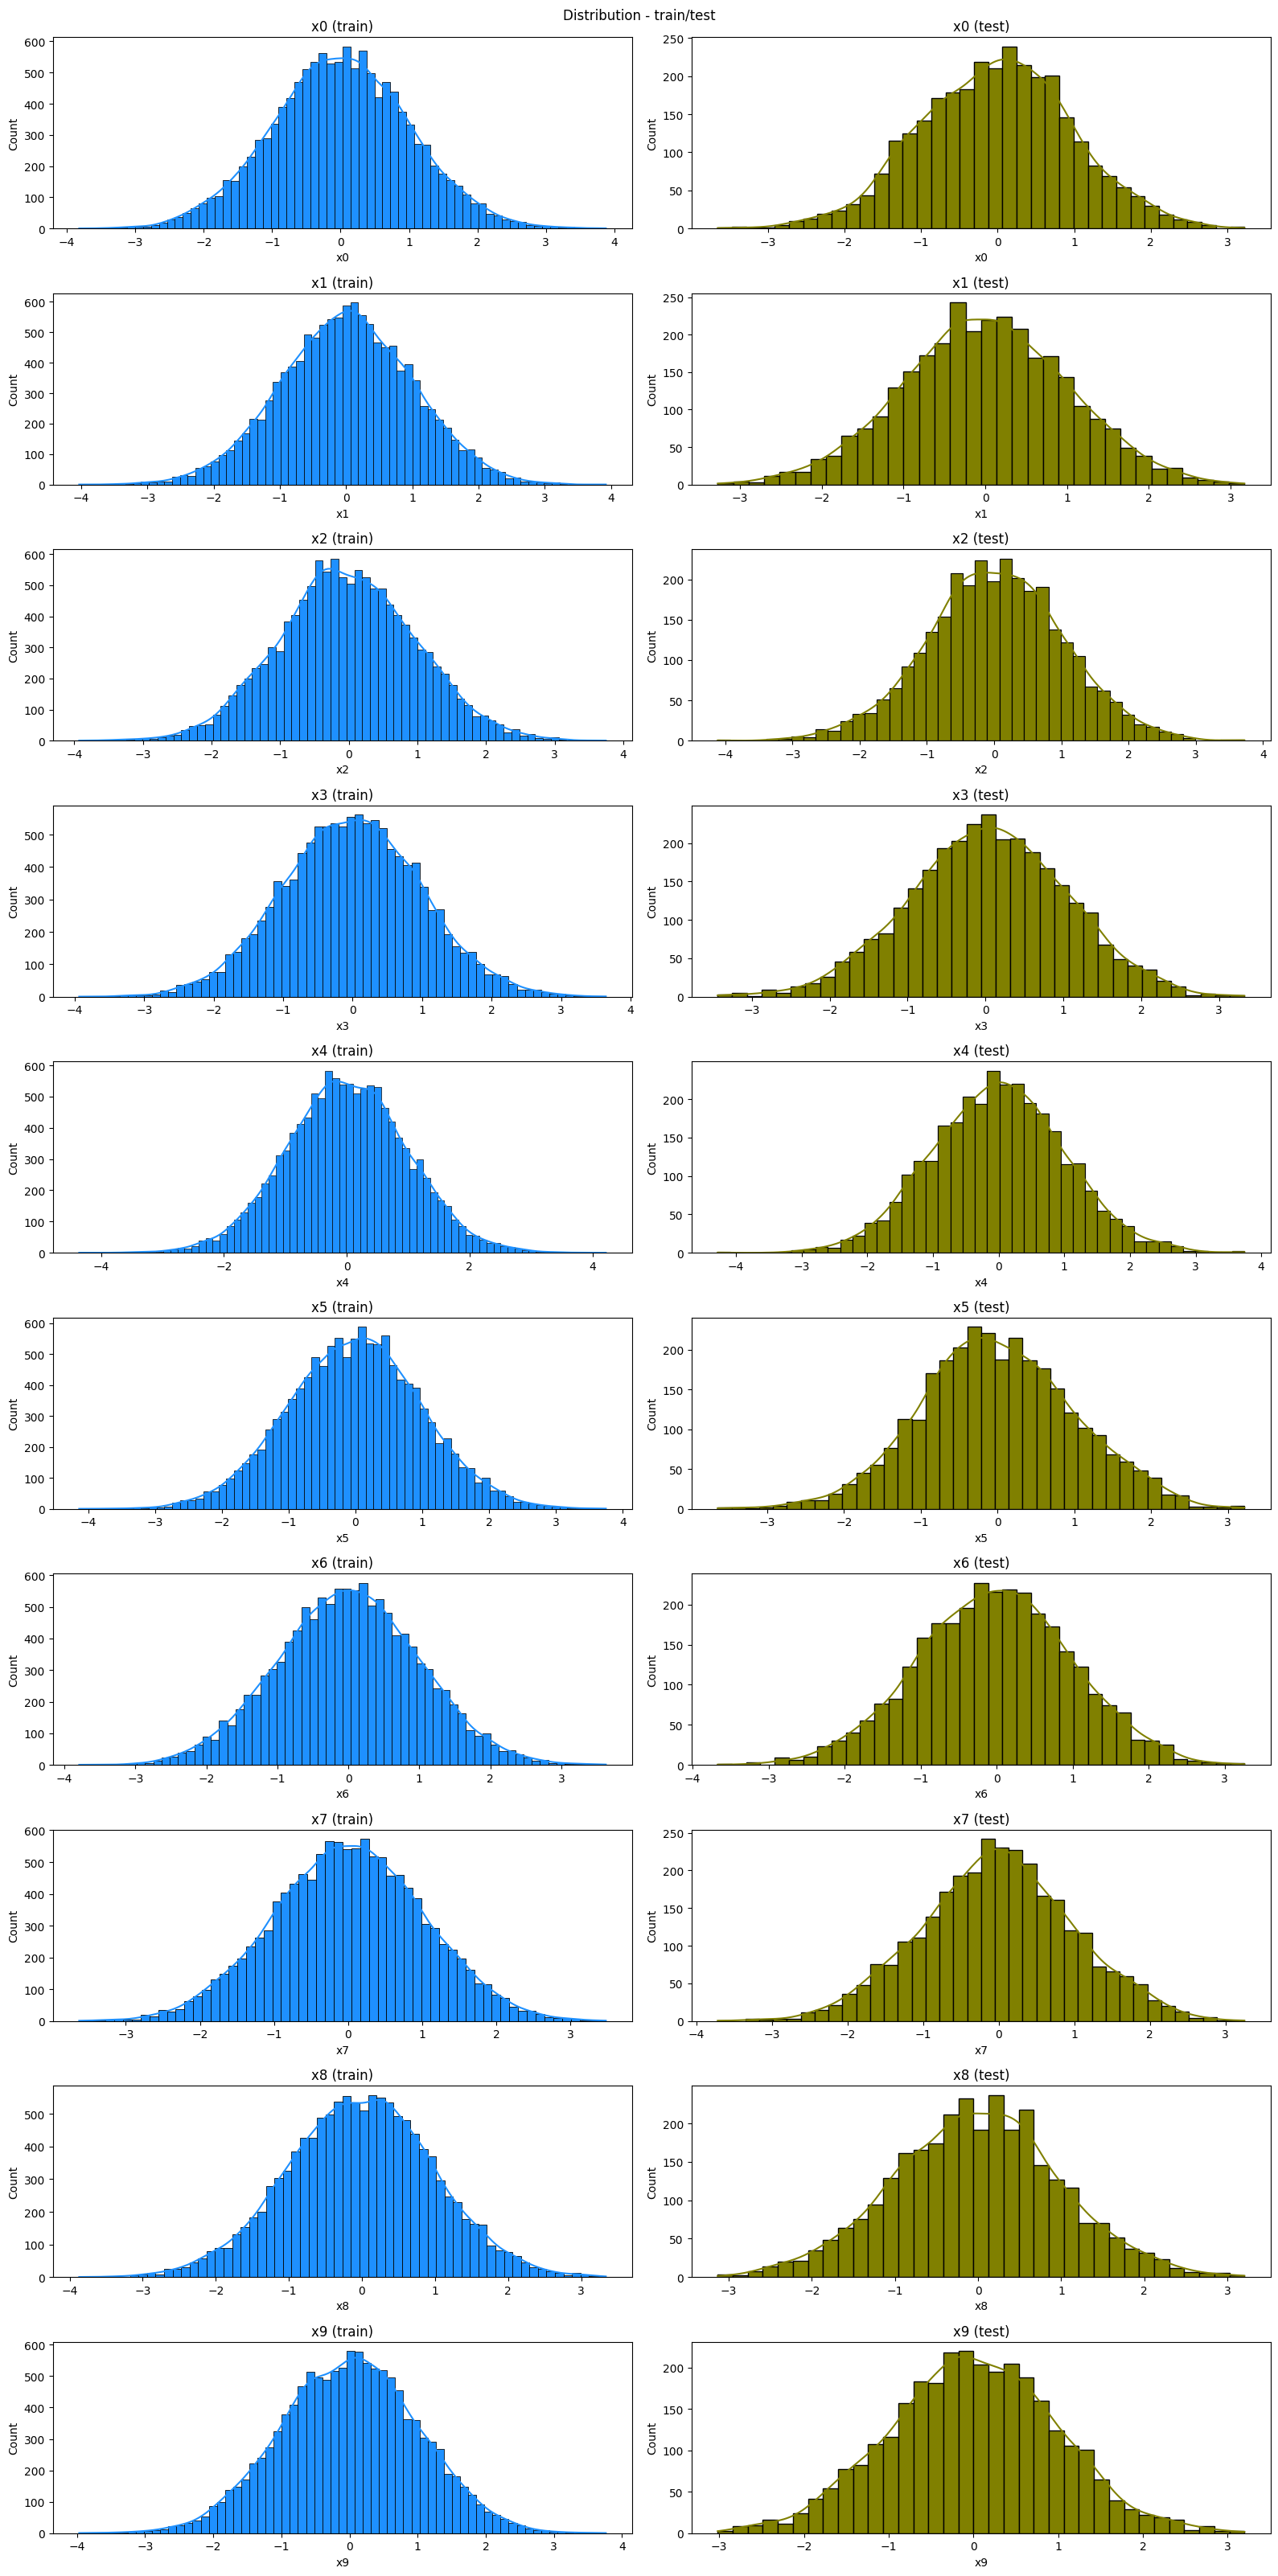

In [11]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(16, 32))

for i, f in enumerate(features):
    sns.histplot(X[f], ax=axes[i, 0], color="dodgerblue", alpha=1, kde=True)
    axes[i, 0].set_title(f + " (train)")
    sns.histplot(X_test[f], ax=axes[i, 1], color="olive", alpha=1, kde=True)
    axes[i, 1].set_title(f + " (test)")

fig.tight_layout()
plt.suptitle("Distribution - train/test", y=1.0)
plt.show()

### Box Plots for Train and Test set

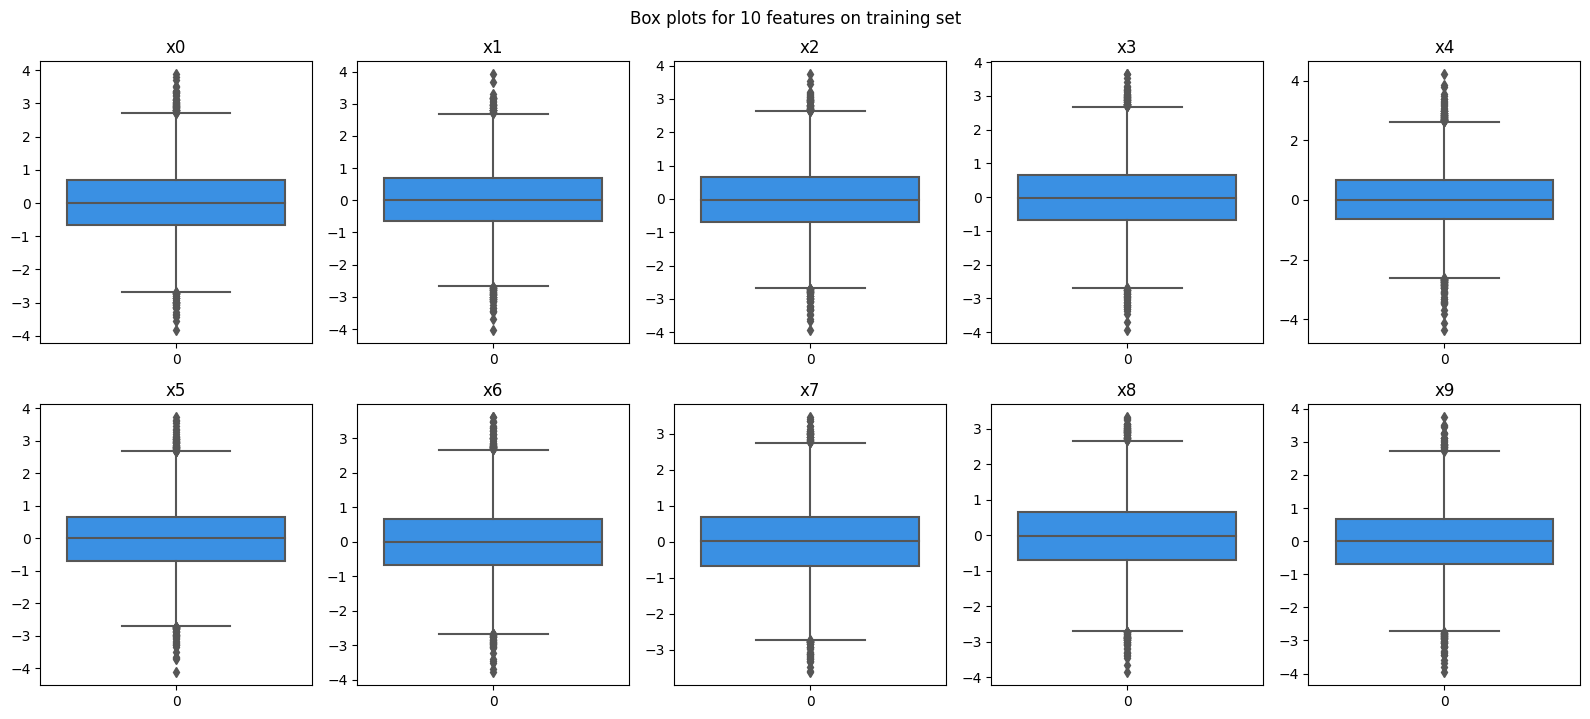

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 7))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.boxplot(X[f], ax=axes[i], color="dodgerblue")
    axes[i].set_title(f)
    
fig.tight_layout()
fig.suptitle("Box plots for 10 features on training set", y=1.02)
plt.show()

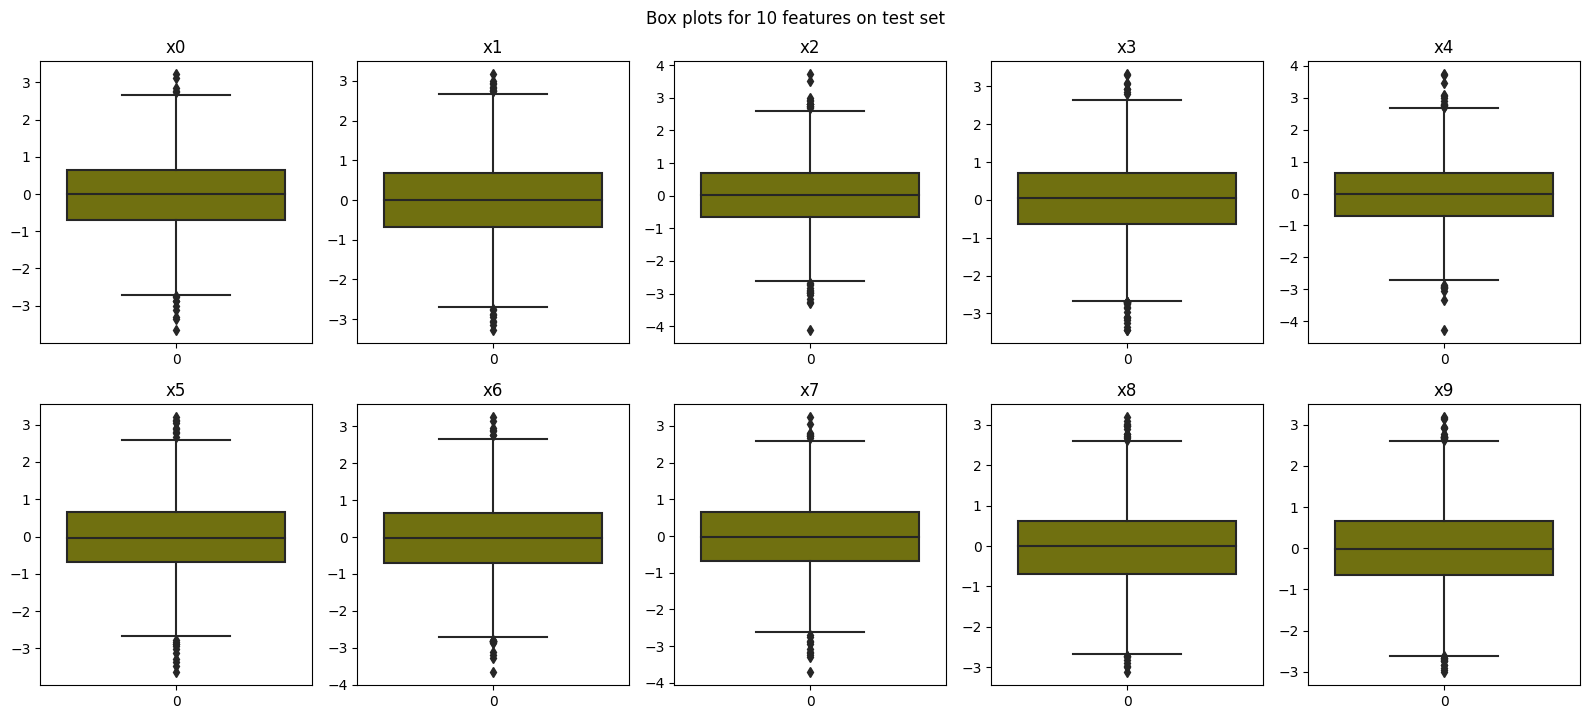

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 7))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.boxplot(X_test[f], ax=axes[i], color="olive")
    axes[i].set_title(f)
    
fig.tight_layout()
plt.suptitle("Box plots for 10 features on test set", y=1.02)
plt.show()

### Histogram of target variable 'y'

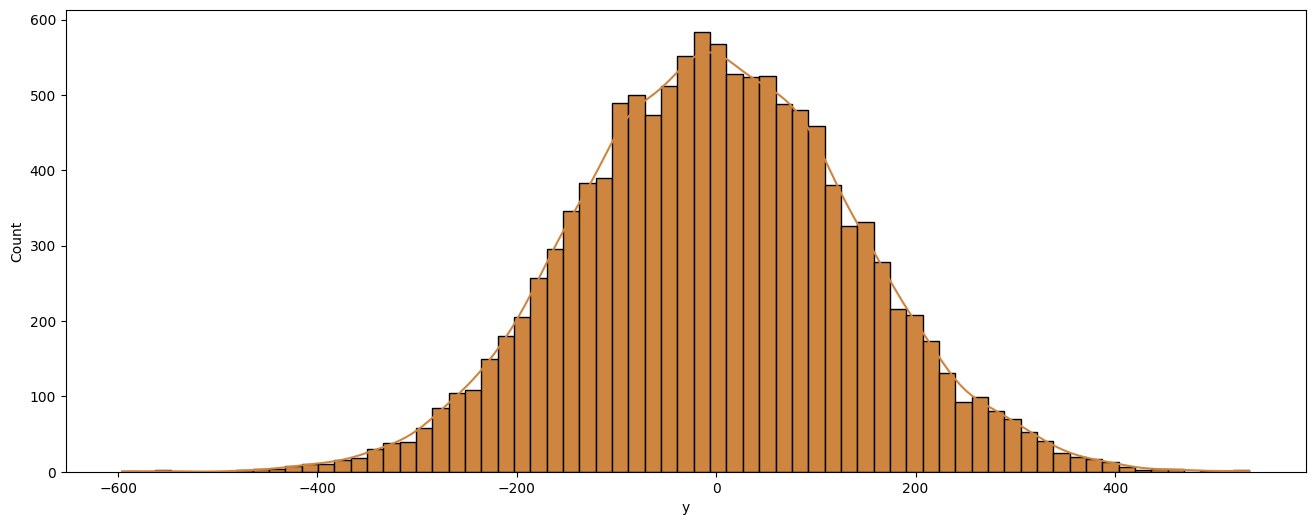

In [14]:
plt.figure(figsize=(16, 6))
sns.histplot(y, color="peru", alpha=1, kde=True);

### How our target 'y' is spread across the various features

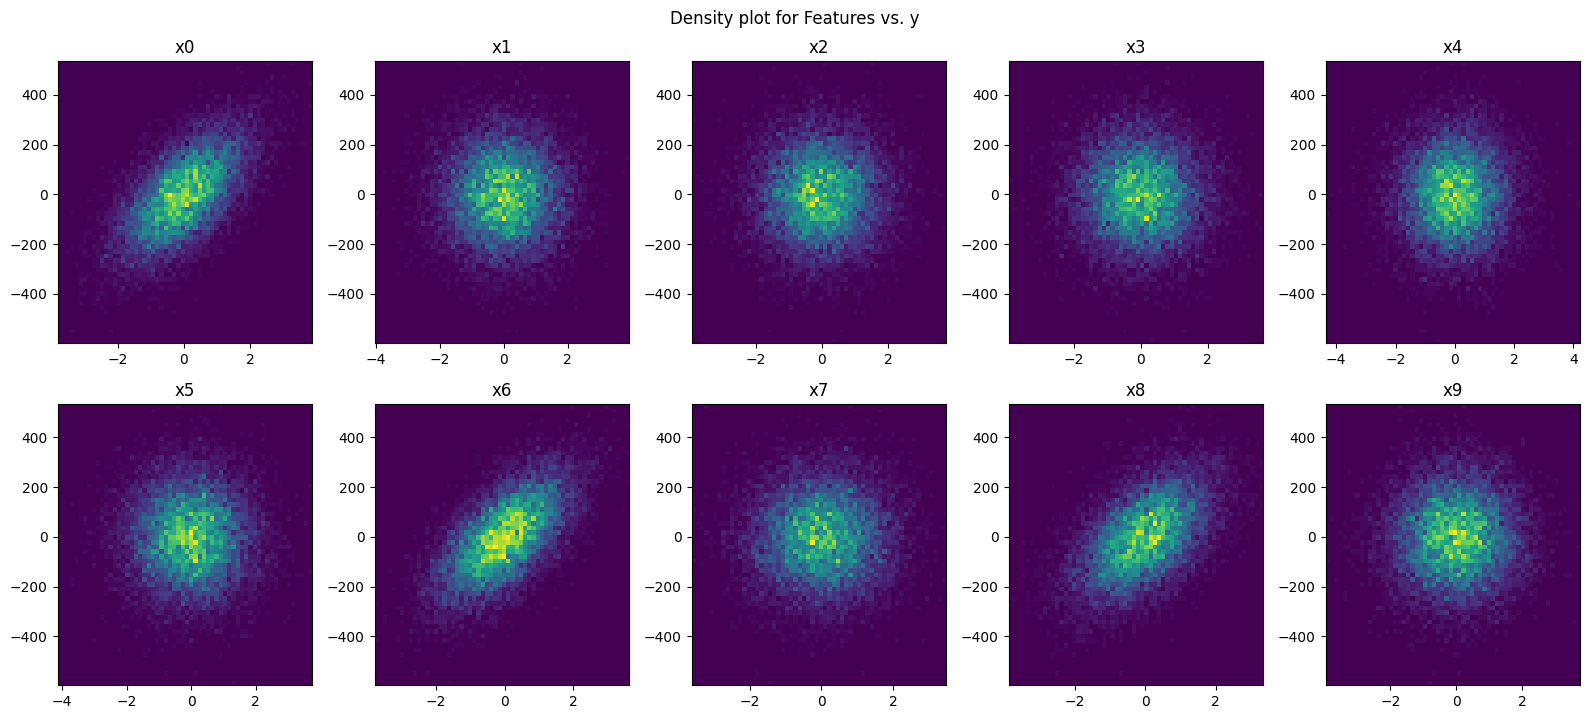

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 7))

for i, f in enumerate(features):
    ax = axes[i // 5, i % 5]
    ax.hist2d(x=X[f], y=y, bins=(60, 60), cmap=plt.cm.viridis)
    ax.set_title(f)

fig.tight_layout()
plt.suptitle("Density plot for Features vs. y", y=1.02)
plt.show()

### Correlation between 10 features

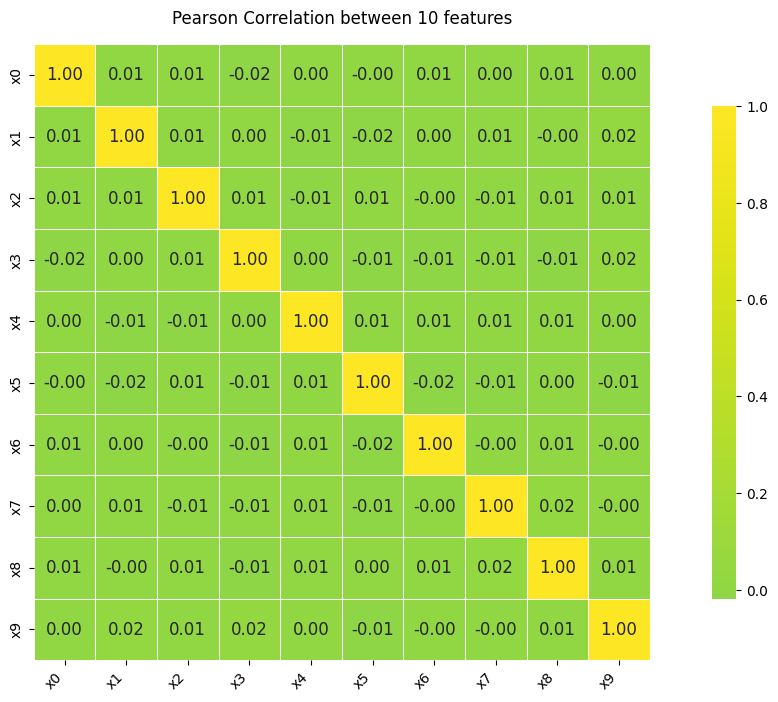

In [16]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr, cmap=plt.cm.viridis, center=-2, square=True, annot=True, annot_kws={"fontsize":12}, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Pearson Correlation between 10 features", y=1.02)
plt.show()

### Correlation between the features and target 'y'

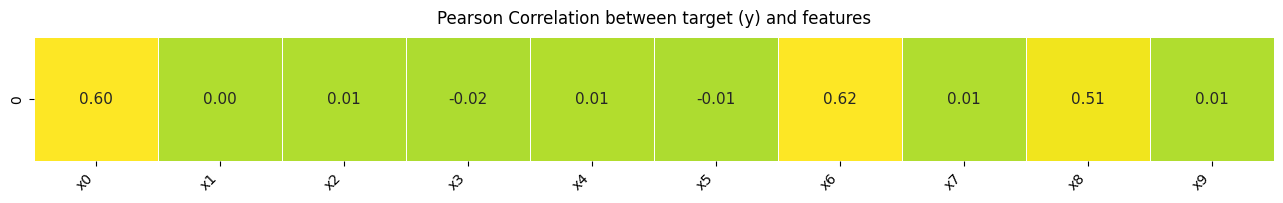

In [17]:
corr = X.corrwith(y)
fig, ax = plt.subplots(figsize=(16, 4))
sns.heatmap(pd.DataFrame(corr).T, cmap=plt.cm.viridis, center=-2, square=True, annot=True, annot_kws={"fontsize":11}, fmt='.2f', linewidths=0.5, cbar=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Pearson Correlation between target (y) and features", y=1.04)
plt.show()

## Outliers

### Defining Range

In [18]:
l = 0.20
h = 0.80

### Function for calculating IQR

In [19]:
def get_iqr_lh(series, l, h):
    q1 = series.quantile(l)
    q3 = series.quantile(h)
    iqr = q3 - q1
    return (q1 - 1.5 * iqr), (q3 + 1.5 * iqr)

### Effect of outliers on the training data

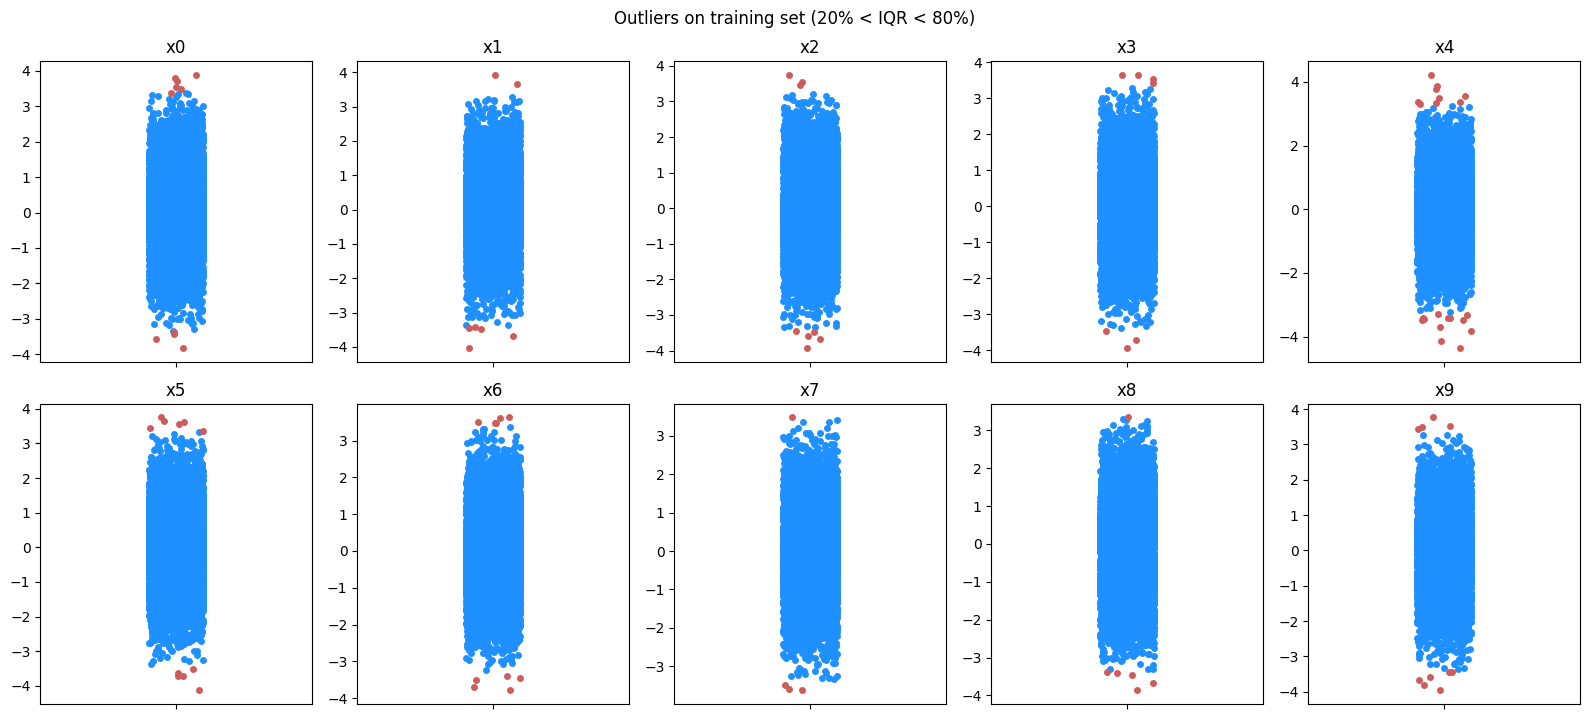

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 7))
axes = axes.flatten()

for i, f in enumerate(features):
    data = X[f]
    low, high = get_iqr_lh(data, l, h)
    sns.stripplot(data[(data >= low) & (data <= high)], ax=axes[i], color="dodgerblue")
    sns.stripplot(data[(data < low) | (data > high)], ax=axes[i], color="indianred")
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
fig.tight_layout()
plt.suptitle(f"Outliers on training set ({round(l*100)}% < IQR < {round(h*100)}%)", y=1.02)
plt.show()

### Effect of outliers on the test data

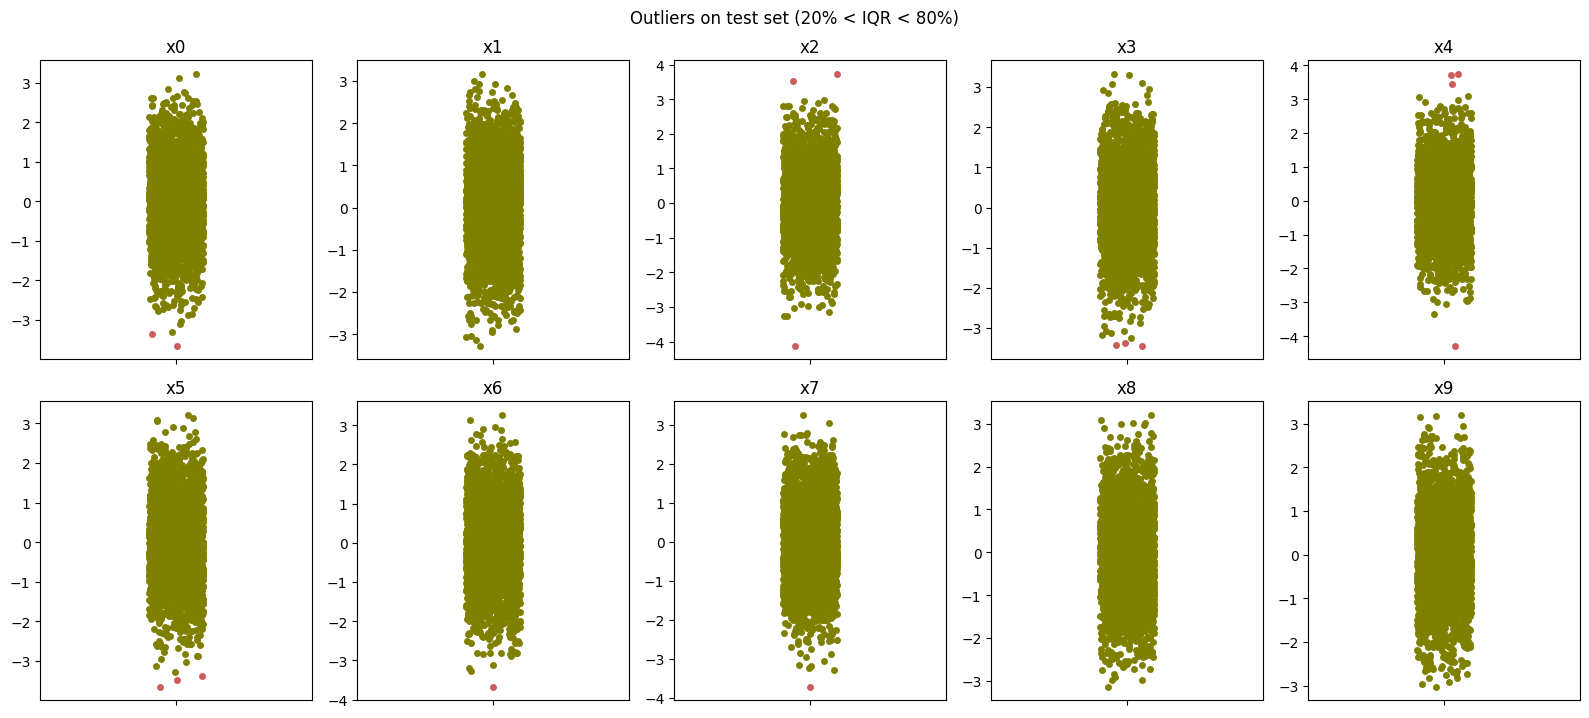

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 7))
axes = axes.flatten()

for i, f in enumerate(features):
    data = X_test[f]
    low, high = get_iqr_lh(data, l, h)
    sns.stripplot(data[(data >= low) & (data <= high)], ax=axes[i], color="olive")
    sns.stripplot(data[(data < low) | (data > high)], ax=axes[i], color="indianred")
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
fig.tight_layout()
plt.suptitle(f"Outliers on test set ({round(l*100)}% < IQR < {round(h*100)}%)", y=1.02)
plt.show()

### Function for finding out features that have outliers

In [22]:
# making a list which falls outside higher and lower bounds
have_outlier = []

for f in features:
    low, high = get_iqr_lh(X[f], l, h)
    outliers = X[(X[f] < low) | (X[f] > high)][f]
    if not outliers.empty:
        have_outlier.append(f)

### Scatter Plot of Features vs. 'y' with outliers present in the data

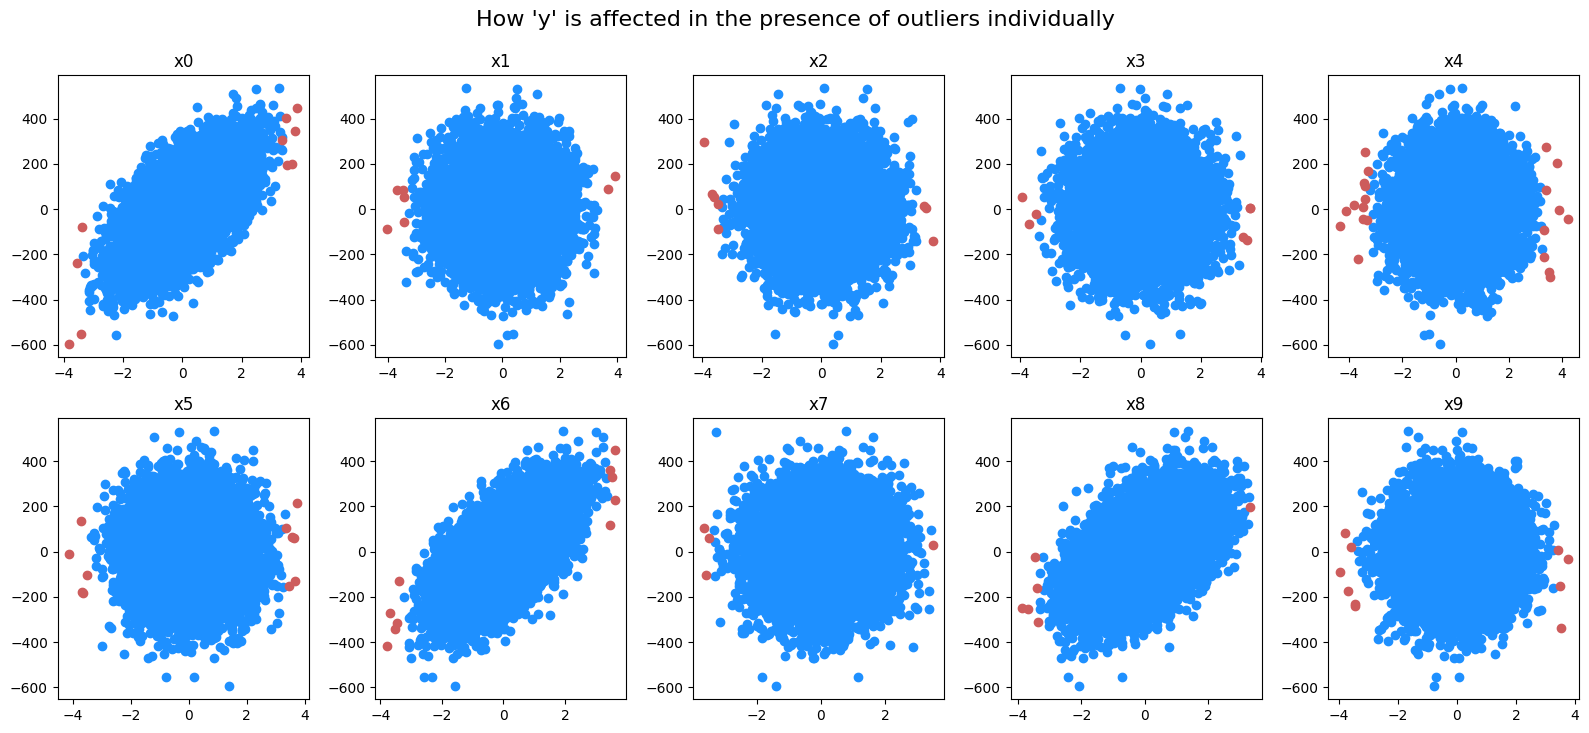

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 7))

for i, f in enumerate(have_outlier):
    x = X[f]
    low, high = get_iqr_lh(x, l, h)
    outlier_mask = (x < low) | (x > high)
    
    ax = axes[i // 5, i % 5]  # Access the appropriate subplot
    ax.scatter(x[~outlier_mask], y[~outlier_mask], color="dodgerblue")
    ax.scatter(x[outlier_mask], y[outlier_mask], color="indianred")
    ax.set_title(f)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()
fig.suptitle("How 'y' is affected in the presence of outliers individually", fontsize=16, y=1.04)
plt.show()

## END OF EDA